In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 解决中文标题，坐标轴名，刻度名等问题
plt.rcParams["axes.unicode_minus"]=False

# 读取并观察数据
data = pd.read_table("data/sheets.txt", sep="\t",header=0, encoding="utf8") # 用python读取txt文件，分隔符为"\t"空格符
"""
Variables:
2 v1  工单属性
4 v3 工单类型
7 v6  事项分类
8 v7  紧急程度
10 v9  工单来源
11 v10  主体类型
"""
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115360 entries, 0 to 115359
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ID_number  115360 non-null  object
 1   v1         115360 non-null  object
 2   v2         115360 non-null  object
 3   v3         115360 non-null  object
 4   v4         115360 non-null  object
 5   v5         107401 non-null  object
 6   v6         97510 non-null   object
 7   v7         115285 non-null  object
 8   v8         115280 non-null  object
 9   v9         115338 non-null  object
 10  v10        45244 non-null   object
dtypes: object(11)
memory usage: 9.7+ MB
None


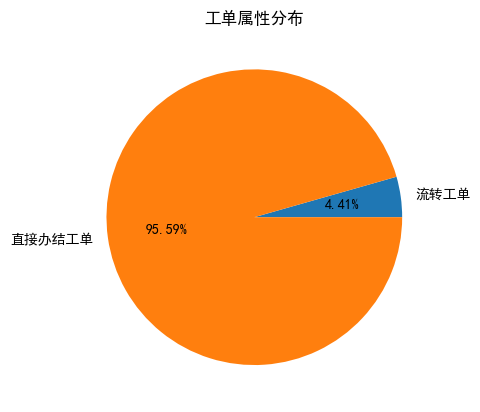

In [41]:
# 工单属性分布（对应“工单属性”）v1
V1 = {} # 工单属性汇总

length = data["v1"].shape[0]
for i in range(length):
    if data["v1"][i] in V1:
        V1[data["v1"][i]] = V1[data["v1"][i]]+1
    else:
        V1[data["v1"][i]] = 1

"""
{'流转工单': 5090, '直接办结工单': 110270}
"""
Y = [5090,110270]
Y_label = ["流转工单","直接办结工单"]
plt.pie(Y, labels=Y_label, autopct='%.2f%%') # 流转工单与直接办结工单数量差距过大，柱状图画出来不好看
plt.title("工单属性分布")
plt.savefig("figure/工单属性分布.png")
plt.show()

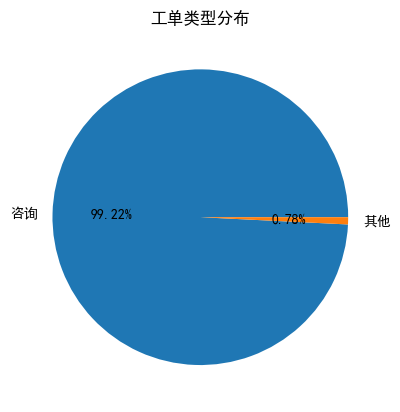

In [42]:
# 工单类型分布（对应”工单类型“）v3
V3 = {} # 工单类型汇总

length = data["v1"].shape[0]
for  i in range(length):
    if data["v3"][i] in V3:
        V3[data["v3"][i]] = V3[data["v3"][i]]+1
    else:
        V3[data["v3"][i]] = 1

"""
{'求助': 172, '咨询': 114457, '办理': 518, '***': 67,'投诉': 118,'建议': 20,'信访': 6,'表扬': 2}
"""

Y = [114457, length-114457]
Y_label =["咨询","其他"]

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("工单类型分布")
plt.savefig("figure/工单类型分布.png")
plt.show()


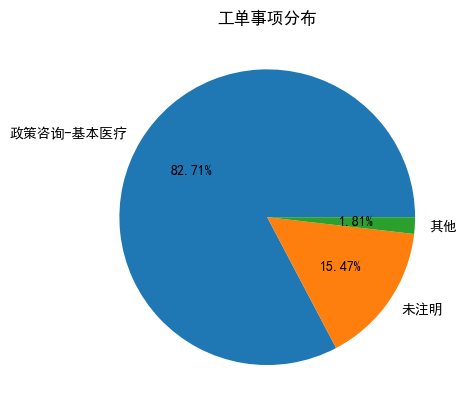

In [43]:
# 工单事项分布（对应”事项分类“）v6
V6 = {} # 工单事项分类汇总

length = data["v1"].shape[0]
for  i in range(length):
    if data["v6"][i]!="nan" and  data["v6"][i] in V6:
        V6[data["v6"][i]] = V6[data["v6"][i]]+1
    elif data["v6"][i]!="nan":
        V6[data["v6"][i]] = 1

"""
{'故障申报': 131,
 '政策咨询-生育': 91,
 '政策咨询-基本医疗': 95419,
 '政策咨询-门诊大病/门诊慢性病/门诊统筹待遇': 263,
 '办公-时间': 88,
 '政策咨询-异地就医': 386,
 '政策咨询-特药': 36,
 '医保卡业务-关联/取消关联': 117,
 '系统操作-个人': 10,
 '***': 67,
 nan: 17850,
 '政策咨询-省外/省内异地急诊': 2,
 '投诉/建议-窗口服务': 34,
 '信息查询-定点/药品/诊疗': 1,
 '信息查询-个人': 569,
 '政策咨询-医保关系转移': 55,
 '系统操作-单位': 172,
 '医保险种变更-居民转职工/灵活就业/失业金/异地': 15,
 '政策咨询-转外就医': 9,
 '投诉/建议建议反馈': 5,
 '信息查询-单位': 10,
 '医保卡业务-制卡': 11,
 '办公-地址': 6,
 '投诉/建议-两定机构违规': 4,
 '医保扶贫-建档立卡贫困人口扶贫': 1,
 '政策咨询-工资申报': 1,
 '系统操作-单位/个人推送登记或缴费数据': 5,
 '医保卡业务-换卡': 1,
 '政策咨询-失能照护': 1}
"""

Y = [95419, 17850,length-95419-17850]
Y_label =["政策咨询-基本医疗","未注明","其他"]

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("工单事项分布")
plt.savefig("figure/工单事项分布.png")
plt.show()

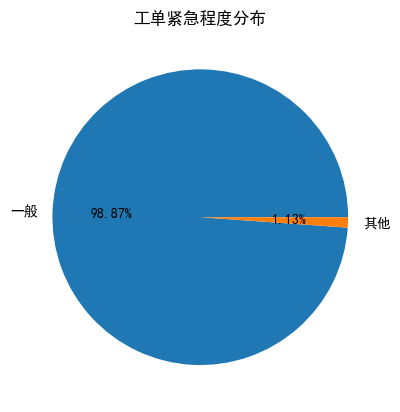

In [44]:
# 工单紧急程度分布（对应紧急程度）v7
V7 = {} # 工单紧急程度汇总

length = data["v1"].shape[0]
for  i in range(length):
    if data["v7"][i]!="nan" and  data["v7"][i] in V7:
        V7[data["v7"][i]] = V7[data["v7"][i]]+1
    elif data["v7"][i]!="nan":
        V7[data["v7"][i]] = 1

"""
{'一般': 114061, '紧急': 809, nan: 75, '特别紧急': 415}
"""

Y = [114061, length-114061]
Y_label =["一般","其他"]

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("工单紧急程度分布")
plt.savefig("figure/工单紧急程度分布.png")
plt.show()

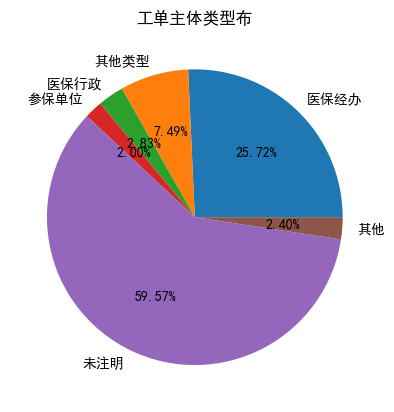

In [47]:
# 工单主体类型分布（对应”主体类型“）v10
V10 = {} # 工单主体类型汇总

length = data["v1"].shape[0]
for  i in range(length):
    if data["v10"][i]!="nan" and  data["v10"][i] in V10:
        V10[data["v10"][i]] = V10[data["v10"][i]]+1
    elif data["v10"][i]!="nan":
        V10[data["v10"][i]] = 1

"""
{'定点医院': 210,
 '其他类型': 8814,
 '医保经办': 30274,
 nan: 70116,
 '医保行政': 3332,
 '定点药店': 106,
 '参保单位': 2349,
 '***': 67,
 '其他机构': 77,
 '长护险定点': 15}
"""

Y = [30274,8814,3332,2349,70116, length-30274-8814-3332-70116]
Y_label =["医保经办","其他类型","医保行政","参保单位","未注明","其他"]

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("工单主体类型布")
plt.savefig("figure/工单主体类型分布.png")
plt.show()


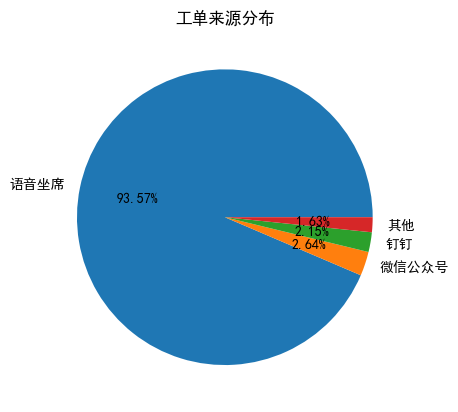

In [51]:
# 工单来源分布（对应”工单来源“）v9
V9 = {} # 工单来源汇总

length = data["v1"].shape[0]
for  i in range(length):
    if data["v9"][i]!="nan" and  data["v9"][i] in V9:
        V9[data["v9"][i]] = V9[data["v9"][i]]+1
    elif data["v9"][i]!="nan":
        V9[data["v9"][i]] = 1

"""
{'定点单位': 8,
 '语音坐席': 107948,
 '现场大厅': 439,
 '12345热线': 14,
 '***': 67,
 '网站': 1314,
 '网上办事大厅': 15,
 '钉钉': 2485,
 '微信公众号': 3048,
 nan: 22}
"""

Y = [107948, 3048,2485, length-107948-3048-2485]
Y_label =["语音坐席","微信公众号","钉钉","其他"]

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("工单来源分布")
plt.savefig("figure/工单来源分布.png")
plt.show()

In [66]:
# 服务效能计算

data = pd.read_table("data/call_receive.txt", sep="\t",header=0, encoding="utf8") # 用python读取txt文件，分隔符为"\t"空格符

T0 = {} # 话务员接听时长
T1 = {} # 话务员工作日期
Name=[] # 话务员名字
Efficiency=[] # 话务员工作效率


length = data.shape[0]
for i in range(length):
    if data["receive_number"][i]!="10021":
        if data["receive_number"][i] in T0:
            T0[data["receive_number"][i]] = T0[data["receive_number"][i]]+data["call_duration"][i]
        else:
            T0[data["receive_number"][i]] = data["call_duration"][i]
        
        date = data["receive_time"][i].split(" ")[0]
        if data["receive_number"][i] in T1:
            if date not in T1[data["receive_number"][i]]:
                T1[data["receive_number"][i]].append(date)
        else:
            T1[data["receive_number"][i]]=[date]

for name in T0:
    Name.append(name) 
    t0 = T0[name]
    t1 = len(T1[name])*8*3600
    Efficiency.append(str(round(100*t0/t1,2))+"%")

df = pd.DataFrame({"name":Name, "efficiency":Efficiency})
df.to_csv("data/efficiency.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_14436\2900250023.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table("data/call_receive.txt", sep="\t",header=0, encoding="utf8") # 用python读取txt文件，分隔符为"\t"空格符


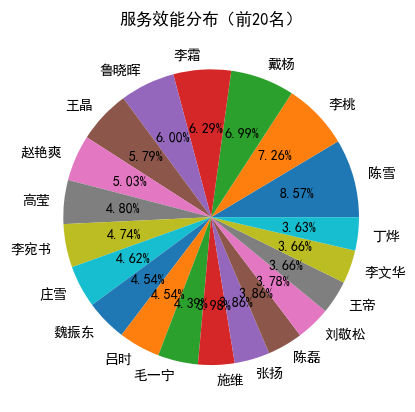

In [21]:
data = pd.read_csv("data/efficiency.csv",encoding="gbk") # 默认的utf8编码打不开中文文件时，可以试试gbk编码

Y = data["efficiency"][:20].values # 以前20名为例
Y_label = data["name"][:20].values

plt.pie(Y, labels=Y_label, autopct='%.2f%%') 
plt.title("服务效能分布（前20名）")
plt.savefig("figure/服务效能分布.png")
plt.show()